In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from tqdm import tqdm

In [3]:
def generate_data(N):
    
    '''
    This function creates the data according to the rule above.
    
    Inputs:
    N - integer.  The number of samples to draw.
    
    '''
    
    # Some logic to prevent some errors
    if N<=0:
        raise ValueError('N must be a postivie integer')
    if isinstance(N,float):
        N = int(np.floor(N))

    # Generate the features to learn from.
    # Features are iid standard gaussian, so draw from a multivariable standar normal in which the 
    # covariance matrix is the identity
    
    X = np.random.multivariate_normal(mean = np.zeros(10), cov = np.eye(10), size = N)

    
    # Calculate the sum to determine if y=0 or y=1
    
    radius_squared  = np.linalg.norm(X, 2, axis = 1)**2
    
    y = radius_squared>9.34
    
    y = y.astype(int)

    return X,y

In [8]:
# Perform the simulation below.  Initialize somewhere to store the errors

number_of_simulations = 50

err_bag_rf1 = np.zeros(number_of_simulations)
err_bag_rf2 = np.zeros(number_of_simulations)
err_boost_rf3 = np.zeros(number_of_simulations)

for i in tqdm(range(number_of_simulations)):

    # Step 1: 
    # Generate a training data set of 2000 observations according to the description above.  
    # Label each of these training examples according to the rule above.
    
    Xtrain,ytrain = generate_data(N=2000)  
    
    
    # Instantiate Models
    
    bag_rf1 = BaggingClassifier(RandomForestClassifier(), n_estimators=500, max_features=1)
    bag_rf2 = BaggingClassifier(RandomForestClassifier(), n_estimators=500, max_features=3)
    boost_rf3 = AdaBoostClassifier(RandomForestClassifier(max_features=3), n_estimators=500)
   
    
    # Step 2: Train a bagged estimator
    # Use 500 trees in your random forests and bagged estimator.
    
    bag_rf1.fit(Xtrain, ytrain) 
    bag_rf2.fit(Xtrain, ytrain)
    boost_rf3.fit(Xtrain, ytrain)
    
    
    #Step 3:
    # Generate a testing data set of 10,000 observations according to the description above.  
    # Label each of these training examples according to the rule above.
   
    Xtest,ytest = generate_data(N=10_000)  

    # Step 4:
    # Use each model to predict on the testing data.  
    
    bag_rf1_pred = bag_rf1.predict(Xtest)
    bag_rf2_pred = bag_rf2.predict(Xtest)
    boost_rf3_pred = boost_rf3.predict(Xtest)

    
    # Record the testing error rate (that is 1 - accuracy).
    
    err_bag_rf1[i] = 1 - accuracy_score(ytest, bag_rf1_pred)
    err_bag_rf2[i] = 1 - accuracy_score(ytest, bag_rf2_pred)
    err_boost_rf3[i] = 1 - accuracy_score(ytest, boost_rf3_pred)
    

#Plot the error rate

100%|██████████| 50/50 [55:19<00:00, 63.54s/it]


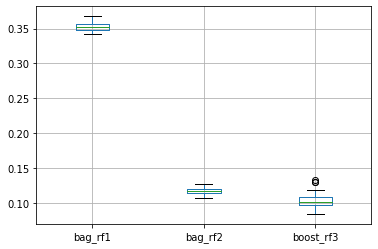

In [9]:
estimators = {'bag_rf1': err_bag_rf1, 'bag_rf2': err_bag_rf2, 'boost_rf3': err_boost_rf3}

df = pd.DataFrame(estimators)

df

df.boxplot()